<a href="https://colab.research.google.com/github/Mr-Ako/-/blob/master/titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score



In [32]:
train_data = pd.read_csv('/content/drive/MyDrive/tt/train.csv')
test_data = pd.read_csv('/content/drive/MyDrive/tt/test.csv')

train_test = [train_data, test_data]

In [33]:
train_data.shape

(891, 12)

In [34]:
list(train_data.columns)

['PassengerId',
 'Survived',
 'Pclass',
 'Name',
 'Sex',
 'Age',
 'SibSp',
 'Parch',
 'Ticket',
 'Fare',
 'Cabin',
 'Embarked']

In [35]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [36]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [37]:
train_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [39]:
list(train_data['Age'].sort_values())[:30]

[0.42,
 0.67,
 0.75,
 0.75,
 0.83,
 0.83,
 0.92,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 3.0,
 3.0,
 3.0,
 3.0,
 3.0,
 3.0]

In [40]:
train_data.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [42]:
train_data['Survived'].value_counts(), train_data['Survived'].value_counts(normalize=True),

(0    549
 1    342
 Name: Survived, dtype: int64,
 0    0.616162
 1    0.383838
 Name: Survived, dtype: float64)

In [43]:
train_data.groupby('Sex')[['Survived']].mean()

,Survived
Sex,
female,0.742038
male,0.188908


In [45]:
train_data[['Pclass', 'Survived']].groupby(['Pclass']).mean()

,Survived
Pclass,
1,0.629630
2,0.472826
3,0.242363


In [44]:
train_data.pivot_table('Survived', index='Sex', columns='Pclass')

Pclass,1,2,3
Sex,,,
female,0.968085,0.921053,0.500000
male,0.368852,0.157407,0.135447


<Axes: xlabel='Pclass', ylabel='Survived'>

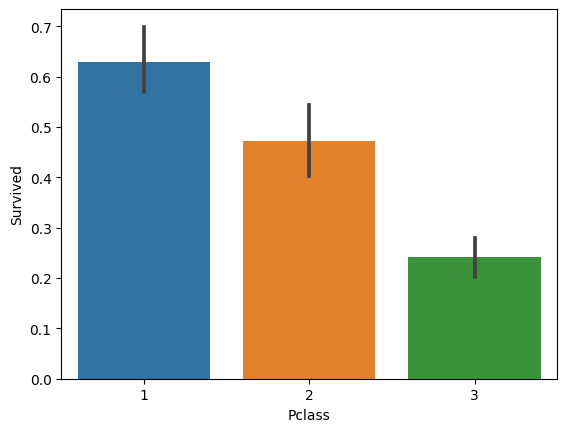

In [46]:
sns.barplot(x='Pclass', y='Survived', data=train_data)

In [47]:
max_age= train_data['Age'].max()
max_age

80.0

In [51]:
age_gap = pd.cut(train_data['Age'], [0, 30, max_age])
train_data.pivot_table('Survived', ['Sex', age_gap], 'Pclass')

Pclass                      1         2         3
Sex    Age                                       
female (0.0, 30.0]   0.942857  0.931818  0.506329
       (30.0, 80.0]  0.980000  0.900000  0.304348
male   (0.0, 30.0]   0.500000  0.192308  0.167630
       (30.0, 80.0]  0.360000  0.106383  0.112500

<ipython-input-54-1936c57627ce>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(train_data.corr(),annot = True, linewidths = 0.3)


<Axes: >

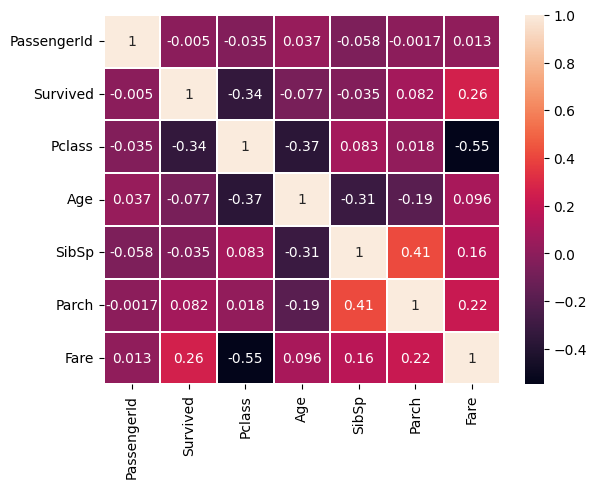

In [54]:
sns.heatmap(train_data.corr(),annot = True, linewidths = 0.3)

In [86]:
for each in train_test:
    each['Sex'].replace(['male','female'],inplace=True)
    each['Embarked'].replace(['S', 'C', 'Q'],inplace=True)
    each = each.fillna({'Embarked':0}, inplace=True)


train_data['Embarked'] = train_data['Embarked'].astype(int)
test_data['Embarked'] = test_data['Embarked'].astype(int)

In [87]:
train_data['Rank'] = train_data['Name'].str.extract(' ([A-Za-z]+)\.,', expand=False)
test_data['Rank'] = test_data['Name'].str.extract(' ([A-Za-z]+)\.,', expand=False)
train_data['Rank'].value_counts()

Series([], Name: Rank, dtype: int64)

In [88]:
for each in train_test:
    each['Rank'] = each['Rank'].replace(['Lady', 'Capt', 'Col', 'Major', 'Rev', 'Jonkheer', 'Don', 'Sir', 'Ms', 'Mme'], 'Lady')
    each['Rank'] = each['Rank'].replace(['Countriess', 'Lady', 'Sir'], 'Royal')
    each['Rank'] = each['Rank'].replace(['Mlle', 'Ms',], 'Miss')
    each['Rank'] = each['Rank'].replace('Mme', 'Mrs')

    train_data[['Rank', 'Survived']].groupby(['Rank']).mean()



In [89]:
train_data.groupby('Rank')['Age'].mean()

Series([], Name: Age, dtype: float64)

In [91]:
train_data['Age'] = pd.cut(train_data['Age'], 5)
train_data[['Age', 'Survived']].groupby(['Age']).mean()

,Survived
Age,
"(0.34, 16.336]",0.550000
"(16.336, 32.252]",0.369942
"(32.252, 48.168]",0.404255
"(48.168, 64.084]",0.434783
"(64.084, 80.0]",0.090909


In [92]:
train_data['Age'] = train_data['Age'].astype
test_data['Age'] = test_data['Age'].astype

In [93]:
train_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Rank,Age_range
0,1,0,3,"Braund, Mr. Owen Harris",0,<bound method NDFrame.astype of 0 (16.336...,1,0,A/5 21171,7.2500,NaN,0,NaN,"(16.336, 32.252]"
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,<bound method NDFrame.astype of 0 (16.336...,1,0,PC 17599,71.2833,C85,0,NaN,"(32.252, 48.168]"
2,3,1,3,"Heikkinen, Miss. Laina",0,<bound method NDFrame.astype of 0 (16.336...,0,0,STON/O2. 3101282,7.9250,NaN,0,NaN,"(16.336, 32.252]"
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,<bound method NDFrame.astype of 0 (16.336...,1,0,113803,53.1000,C123,0,NaN,"(32.252, 48.168]"
4,5,0,3,"Allen, Mr. William Henry",0,<bound method NDFrame.astype of 0 (16.336...,0,0,373450,8.0500,NaN,0,NaN,"(32.252, 48.168]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",0,<bound method NDFrame.astype of 0 (16.336...,0,0,211536,13.0000,NaN,0,NaN,"(16.336, 32.252]"
887,888,1,1,"Graham, Miss. Margaret Edith",0,<bound method NDFrame.astype of 0 (16.336...,0,0,112053,30.0000,B42,0,NaN,"(16.336, 32.252]"
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",0,<bound method NDFrame.astype of 0 (16.336...,1,2,W./C. 6607,23.4500,NaN,0,NaN,NaN
889,890,1,1,"Behr, Mr. Karl Howell",0,<bound method NDFrame.astype of 0 (16.336...,0,0,111369,30.0000,C148,0,NaN,"(16.336, 32.252]"


In [95]:
train_data['Fare_Range']=pd.qcut(train_data['Fare'],5)
train_data.groupby(['Fare_Range'])['Survived'].mean()

Fare_Range
(-0.001, 7.854]      0.217877
(7.854, 10.5]        0.201087
(10.5, 21.679]       0.424419
(21.679, 39.688]     0.444444
(39.688, 512.329]    0.642045
Name: Survived, dtype: float64

In [96]:
train_data['Fare'] = train_data['Fare'].astype
test_data['Fare'] = test_data['Fare'].astype

In [97]:
train_data
test_data

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Rank
0,892,3,"Kelly, Mr. James",0,<bound method NDFrame.astype of 0 34.5\n1...,0,0,330911,<bound method NDFrame.astype of 0 7.829...,NaN,2,NaN
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",0,<bound method NDFrame.astype of 0 34.5\n1...,1,0,363272,<bound method NDFrame.astype of 0 7.829...,NaN,2,NaN
2,894,2,"Myles, Mr. Thomas Francis",0,<bound method NDFrame.astype of 0 34.5\n1...,0,0,240276,<bound method NDFrame.astype of 0 7.829...,NaN,2,NaN
3,895,3,"Wirz, Mr. Albert",0,<bound method NDFrame.astype of 0 34.5\n1...,0,0,315154,<bound method NDFrame.astype of 0 7.829...,NaN,2,NaN
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",0,<bound method NDFrame.astype of 0 34.5\n1...,1,1,3101298,<bound method NDFrame.astype of 0 7.829...,NaN,2,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",0,<bound method NDFrame.astype of 0 34.5\n1...,0,0,A.5. 3236,<bound method NDFrame.astype of 0 7.829...,NaN,2,NaN
414,1306,1,"Oliva y Ocana, Dona. Fermina",0,<bound method NDFrame.astype of 0 34.5\n1...,0,0,PC 17758,<bound method NDFrame.astype of 0 7.829...,C105,2,NaN
415,1307,3,"Saether, Mr. Simon Sivertsen",0,<bound method NDFrame.astype of 0 34.5\n1...,0,0,SOTON/O.Q. 3101262,<bound method NDFrame.astype of 0 7.829...,NaN,2,NaN
416,1308,3,"Ware, Mr. Frederick",0,<bound method NDFrame.astype of 0 34.5\n1...,0,0,359309,<bound method NDFrame.astype of 0 7.829...,NaN,2,NaN


In [100]:
ids = test_data['PassengerId']
predictions = log_reg.predict(test_data.drop('PassengerId', axis=1))

output = pd.DataFrame({ 'PassengerId' : ids, 'Survived': predictions })
output.to_csv('submission.csv', index=False)

SyntaxError: ignored